<a href="https://colab.research.google.com/github/DilukaB/Credit-Card-Fraud-Detection/blob/main/fraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

In [4]:
df = pd.read_csv("/content/creditcard.csv")

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [5]:
print("Dataset shape:", df.shape)
print(df.head())
print("\nClass distribution:\n", df["Class"].value_counts())

Dataset shape: (1986, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

      

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

In [11]:
X = df.drop("Class", axis=1).values
y = df["Class"].values

scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

ValueError: Input y contains NaN.

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


valid_indices = ~pd.isna(y)
X_clean = X[valid_indices]
y_clean = y[valid_indices]

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, stratify=y_clean, random_state=42
)

In [13]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("NaN values in y:", np.isnan(y).sum() if hasattr(y, '__array__') else pd.isna(y).sum())

Shape of X: (1986, 30)
Shape of y: (1986,)
NaN values in y: 1


You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

In [15]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       397

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397



In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       397

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397



In [17]:
mlp = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])

mlp.compile(optimizer="adam", loss="binary_crossentropy",
            metrics=["accuracy", keras.metrics.AUC()])

history = mlp.fit(
    X_train, y_train, validation_data=(X_test, y_test),
    epochs=10, batch_size=2048, verbose=1
)

y_pred_mlp = (mlp.predict(X_test) > 0.5).astype(int)

print("\nMLP Report:")
print(classification_report(y_test, y_pred_mlp))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2569 - auc: 0.4749 - loss: 0.9829 - val_accuracy: 0.2720 - val_auc: 0.0000e+00 - val_loss: 0.8483
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.2903 - auc: 0.4693 - loss: 0.9565 - val_accuracy: 0.3829 - val_auc: 0.0000e+00 - val_loss: 0.7881
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.3652 - auc: 0.5433 - loss: 0.8705 - val_accuracy: 0.4887 - val_auc: 0.0000e+00 - val_loss: 0.7321
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.4307 - auc: 0.4987 - loss: 0.8279 - val_accuracy: 0.6071 - val_auc: 0.0000e+00 - val_loss: 0.6799
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4962 - auc: 0.2913 - loss: 0.7528 - val_accuracy: 0.7204 - val_auc: 0.0000e+00 - val_loss: 0.6317
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5447 - auc: 0.4975 - loss: 0.7259 - val_accuracy: 0.7985 - val_auc: 0.0000e+00 - val_loss: 0.5869
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
input_dim = X_train.shape[1]
encoding_dim = 16

autoencoder = keras.Sequential([
    layers.Dense(encoding_dim, activation="relu", input_shape=(input_dim,)),
    layers.Dense(input_dim, activation="sigmoid")
])

autoencoder.compile(optimizer="adam", loss="mse")

autoencoder.fit(X_train, X_train,
                epochs=10, batch_size=256,
                validation_data=(X_test, X_test), verbose=1)

# Reconstruction errors
X_test_pred = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.square(X_test - X_test_pred), axis=1)

# Choose threshold
threshold = np.percentile(reconstruction_error, 95)
y_pred_ae = (reconstruction_error > threshold).astype(int)

print("\nAutoencoder Report:")
print(classification_report(y_test, y_pred_ae))


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step - loss: 1.1607 - val_loss: 1.2305
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.3246 - val_loss: 1.2152
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.1922 - val_loss: 1.2000
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.2883 - val_loss: 1.1852
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.1676 - val_loss: 1.1708
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2230 - val_loss: 1.1567
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0796 - val_loss: 1.1431
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0974 - val_loss: 1.1298
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.1233 - val_loss: 1.1170
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1385 - val_loss: 1.1047
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step

Autoencoder Report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       397
         

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
print("\n=== ROC AUC Scores ===")
print("Logistic Regression:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print("Random Forest:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print("MLP:", roc_auc_score(y_test, mlp.predict(X_test)))
print("Autoencoder:", roc_auc_score(y_test, reconstruction_error))


=== ROC AUC Scores ===
Logistic Regression: nan
Random Forest: nan
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MLP: nan
Autoencoder: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


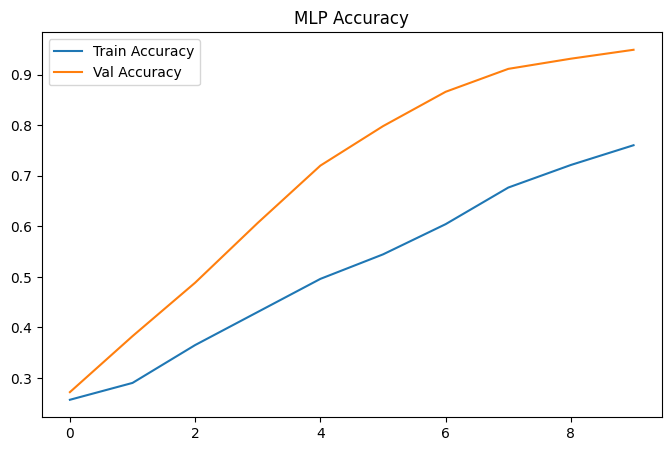

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


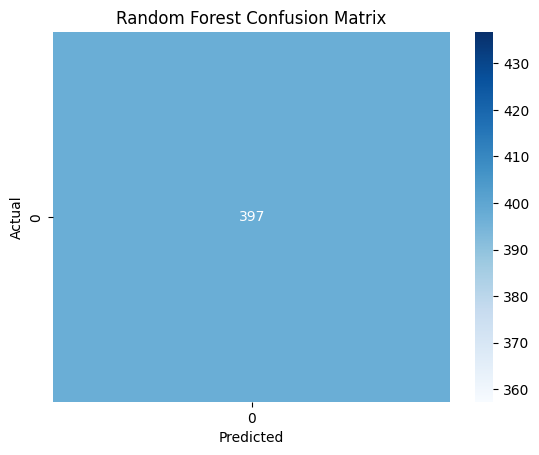

In [20]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("MLP Accuracy")
plt.show()


cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()